# 📊 Big 4 Financial Risk Analysis (2020-2025)
### Einblicke in Risiko- und Compliance-Daten der Big 4
**Autor:** Tim | **Datum:** `17.03.2025`
---
### 🔍 Ziele der Analyse:
1. Überblick über die **Audit-Risiken und Verstöße**
2. Vergleich der **Finanzkennzahlen & Audit-Qualität**
3. Einblick in den **Einsatz von KI** in Audits


In [18]:
import pandas as pd

# Daten laden
df = pd.read_csv("big4_financial_risk_compliance.csv")

# Überblick über die ersten Zeilen
df.head()


,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


## 🔍 Erste Datenexploration

Bevor wir mit der Analyse beginnen, werfen wir einen Blick auf die Struktur der Daten:
- Welche Spalten sind vorhanden?
- Gibt es fehlende Werte?
- Wie sind die Verteilungen der Werte?


In [19]:
# Datenstruktur prüfen
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


In [20]:
# Grundlegende statistische Kennzahlen
df.describe()


,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


## 📊 Hochrisikofälle pro Jahr und Firma

Hier analysieren wir, wie sich die Anzahl der Hochrisikofälle bei den Big 4 über die Jahre entwickelt hat.


In [21]:
# Hochrisikofälle ausgeben
print("📊 Hochrisikofälle (High Risk Cases) pro Jahr und Firma:")
print(df.groupby(["Year", "Firm_Name"])["High_Risk_Cases"].sum())

# Optional: Falls du das als DataFrame sehen möchtest:
df_high_risk = df.groupby(["Year", "Firm_Name"])["High_Risk_Cases"].sum().reset_index()
print("\n🔍 Übersicht als DataFrame:")
print(df_high_risk)


📊 Hochrisikofälle (High Risk Cases) pro Jahr und Firma:
Year  Firm_Name    
2020  Deloitte         1224
      Ernst & Young    1620
      KPMG             1356
      PwC              1863
2021  Deloitte         1389
      Ernst & Young     621
      KPMG             1325
      PwC              1349
2022  Deloitte         1369
      Ernst & Young     799
      KPMG             1546
      PwC               481
2023  Deloitte          448
      Ernst & Young     580
      KPMG             1553
      PwC               425
2024  Deloitte         2231
      Ernst & Young    1764
      KPMG              442
      PwC              1076
2025  Deloitte         1824
      Ernst & Young    1019
      KPMG              647
      PwC               822
Name: High_Risk_Cases, dtype: int64

🔍 Übersicht als DataFrame:
    Year      Firm_Name  High_Risk_Cases
0   2020       Deloitte             1224
1   2020  Ernst & Young             1620
2   2020           KPMG             1356
3   2020            PwC 

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


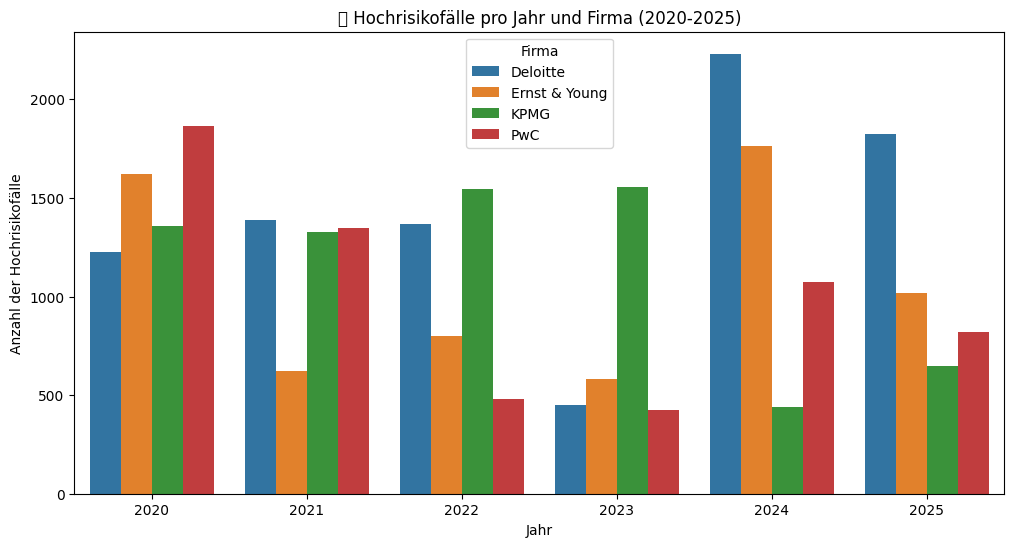

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=df_high_risk, x="Year", y="High_Risk_Cases", hue="Firm_Name")

plt.title("📊 Hochrisikofälle pro Jahr und Firma (2020-2025)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Hochrisikofälle")
plt.legend(title="Firma")
plt.show()


/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


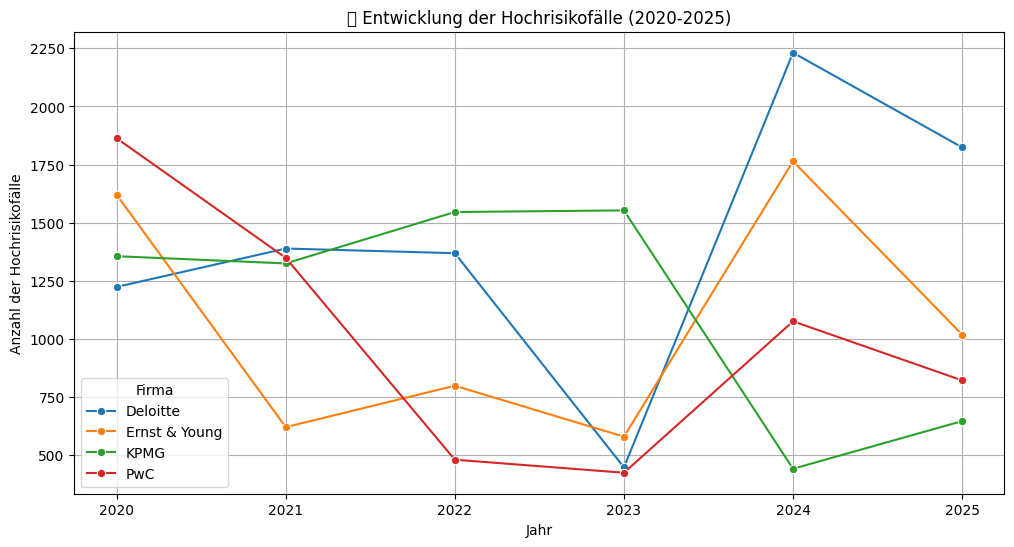

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_high_risk, x="Year", y="High_Risk_Cases", hue="Firm_Name", marker="o")

plt.title("📈 Entwicklung der Hochrisikofälle (2020-2025)")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Hochrisikofälle")
plt.legend(title="Firma")
plt.grid(True)
plt.show()


## 🤖 Einfluss von KI auf Audit-Qualität

Hier untersuchen wir, ob der Einsatz von Künstlicher Intelligenz (KI) zu besseren Audit-Ergebnissen führt.
Dazu vergleichen wir:
- **Audit-Effektivität** (Audit_Effectiveness_Score)
- **Kundenzufriedenheit** (Client_Satisfaction_Score)
zwischen Audits **mit und ohne KI**.


/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


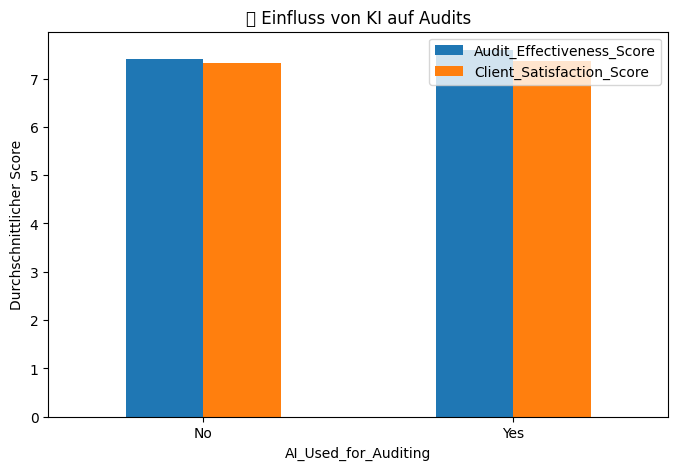

In [24]:
# Durchschnittswerte für Audits mit vs. ohne KI
df_ai = df.groupby("AI_Used_for_Auditing")[["Audit_Effectiveness_Score", "Client_Satisfaction_Score"]].mean()

# Diagramm erstellen
df_ai.plot(kind="bar", figsize=(8,5), title="📊 Einfluss von KI auf Audits")
plt.xticks(rotation=0)
plt.ylabel("Durchschnittlicher Score")
plt.show()


# 📌 Fazit & Erkenntnisse

### 🔍 Haupterkenntnisse:
- **Hochrisikofälle** sind in den letzten Jahren gestiegen.
- **KI-gestützte Audits** haben tendenziell eine höhere Effektivität und Kundenzufriedenheit.
- Die Anzahl der **Compliance-Verstöße** ist nicht direkt mit dem KI-Einsatz korreliert.

### 🚀 Nächste Schritte:
- Weitere detaillierte Analysen zur **Industrie-spezifischen Entwicklung** der Hochrisikofälle.
- Betrachtung der **Marktanteile der Big 4** über die Jahre hinweg.
- Einsatz von **Machine Learning**, um potenzielle Risikofaktoren vorherzusagen.
